## Оглавление 

+ [Описание проекта](#project_description)
+ [Описание данных](#data_description)

+ [Предобработка данных](#prework)
	- [Предобработка orders](#orders_prework)
	- [Предобработка visitors](#visitors_prework)

+ [Часть 1. Приоритезация гипотез](#part_1)
	- [Фреймворк ICE](#ice_frame)
	- [Фреймворк RICE](#rice_frame)
	- [Вывод](#conclusion_1)

+ [Часть 2. Анализ A/B-теста](#part_2)
	- [Проверка корректности А/В теста](#corr_check)
	- [Проверка аудитории](#people_check)
	- [Проверка периодов А/В теста](#period_check)

	- [График кумулятивной выручки](#task_1)
	- [График кумулятивного среднего чека](#task_2)
	- [График относительного изменения среднего чека](#task_3)
	- [График кумулятивного среднего количества заказов](#task_4)
	- [График относительного изменения количества заказов](#task_5)
	- [Точечный график количества заказов](#task_6)
	- [95-й и 99-й перцентили количества заказов на пользователя](#task_7)
	- [Точечный график стоимости заказов](#task_8)
	- [95-й и 99-й перцентили стоимости заказов](#task_9)
	- [Статистическая значимость различий в среднем кол-ве заказов](#task_10)
	- [Статистическая значимость раздичий в среднем чеке](#task_11)
	- [Статистическая значимость различий в среднем кол-ве заказов](#task_12)
	- [Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным](#task_13)
	- [Принятие решения по результатам теста](#task_14)

---

##  <a name="project_description"></a>  Описание проекта

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.

Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

---

## <a name="data_description"></a>  Описание данных

### Данные для первой части:

`Hypothesis` — краткое описание гипотезы;

`Reach` — охват пользователей по 10-балльной шкале;

`Impact` — влияние на пользователей по 10-балльной шкале;

`Confidence` — уверенность в гипотезе по 10-балльной шкале;

`Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. 
Чем больше значение Efforts, тем дороже проверка гипотезы.

### Данные для второй части:
    

 #### Датасет №1:

`transactionId` — идентификатор заказа;

`visitorId` — идентификатор пользователя, совершившего заказ;

`date` — дата, когда был совершён заказ;

`revenue` — выручка заказа;

`group` — группа A/B-теста, в которую попал заказ.

#### Датасет №2:

`date` — дата;

`group` — группа A/B-теста;

`visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

---

##  <a name="prework"></a> Предобработка данных

### Импортируем данные первой части

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display

import scipy.stats as stats
import datetime as dt

from io import BytesIO
import requests

In [60]:
spreadsheet_id = '11d7ytMPwX7WxBCh7x6jYGIjYnKnVEZggoOc6crUmILQ'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
data_1 = pd.read_csv(BytesIO(r.content))
pd.options.display.max_colwidth = 150
data_1

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


**Данные не требуют предобработки**

### Импортируем данные второй части

In [61]:
spreadsheet_id = '1NgCtOqj00U7dg86T_eTCIQ_M92ArJrOqceH_Bbreg_I'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
orders = pd.read_csv(BytesIO(r.content))
# pd.options.display.max_colwidth = 150
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [62]:
spreadsheet_id = '10lpNhJ-M4Ypw-tJ7mQ_Hk2ZzwSQRU2c2r8bMn2UYv2U'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
visitors = pd.read_csv(BytesIO(r.content))
# pd.options.display.max_colwidth = 150
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


#### <a name="orders_prework"></a>  Предобработка orders

Меняем тип столбца "date"

In [63]:
orders["date"] = orders["date"].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Проверяем дубликаты:

In [64]:
print("Кол-во дубликатов =",orders.duplicated().sum())

Кол-во дубликатов = 0


####  <a name="visitors_prework"></a>  Предобработка visitors

Меняем тип столбца "date"

In [65]:
visitors["date"] = visitors["date"].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Проверяем дубликаты:

In [66]:
print("Кол-во дубликатов =",visitors.duplicated().sum())

Кол-во дубликатов = 0


**Предобработка окончена, двигаемся дальше!**

---

## <a name="part_1"></a>  Часть 1. Приоритизация гипотез.

### <a name="ice_frame"></a>  Фреймворк ICE

In [67]:
data_1['ice'] = data_1['Impact'] * data_1['Confidence'] / data_1['Efforts']
data_1.sort_values(by = 'ice', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


### <a name="rice_frame"></a>  Фреймворк RICE

In [68]:
data_1['rice'] = data_1['Reach'] * data_1['Impact'] * data_1['Confidence'] / data_1['Efforts']
data_1.sort_values(by = 'rice', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


###  <a name="conclusion_1"></a>  Вывод

Мы видим, что сортировка задач по ICE отличается от сортировки по RICE. Это связано с тем, что в RICE используется дополнительный параметр Reach, который отвечает за то, скольких пользователей затронет изменение, которое мы хотим внести. Соответственно, если мы понимаем, что нам нужно приоритизировать какую-то задачу и мы хотим повлиять на наибольшее количество пользователей, мы будем использовать RICE. Если нас не волнует процент пользователей, на который мы влияем, мы используем ICE.

По ICE приоритетными гипотезами являются: «Запустить акцию дающую скидку на товар в день рождения» и «Добавить два новых канала привлечения трафика». Однако, эти гипотезы имеют очень низкий параметр Reach, то есть они не затронут большого количества пользователей, но поскольку этот параметр не учитывается в ICE, эти гипотезы возглавляют список приоритезации по всем остальным параметрам.

По RICE приоритетные гипотезы уже другие. Здесь учитывается параметр Reach и благодаря ему гипотеза «Добавить форму подписки на все основные страницы» вырывается вперед. Она имеет показатель Reach равный 10, то есть она затронет 100% пользователей.

В итоге, если мы хотим, чтобы наше нововведение затронуло наибольшее число пользователей и при этом все равно имело высокие остальные показатели, мы должны рассматривать гипотезу «Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок» - ту гипотезу, которая является приоритетной по методу RICE.


---

##  <a name="part_2"></a>  Часть 2. Анализ A/B-теста

После проведения А/В тестирования мы получили определенные данные, которые содержатся в таблицах `orders` и `visitors`. 

Мы должны проанализировать данные, посмотреть, есть ли различия по определенным метрикам между группами А/В теста и сделать выводы, на сколько сильно группы в тесте отличаются друг от друга и стоит ли компании дальше использовать те изменения которые проверялись в ходе А/В тестирования.


#### <a name="corr_check"></a>  Для начала проверим корректность проведенного A/B тестирования.

Посмотрим на размер групп, участвоваших в тесте.

In [69]:
print('Кол-во посетителей в группе А: {}\n'
      'Кол-во посетителей в группе B: {}'.format(visitors[visitors['group']=='A']['visitors'].sum(), 
                                                 visitors[visitors['group']=='B']['visitors'].sum()))
purchasesA = len(orders[orders['group']=='A'])
purchasesB = len(orders[orders['group']=='B'])

print('Кол-во покупок в группе A: {}'.format(purchasesA))
print('Кол-во покупок в группе B: {}'.format(purchasesB))

Кол-во посетителей в группе А: 18736
Кол-во посетителей в группе B: 18916
Кол-во покупок в группе A: 557
Кол-во покупок в группе B: 640


In [70]:
initial_conversion = len(orders[orders['group']=='A']) / visitors[visitors['group']=='A']['visitors'].sum() 

resulting_conversion = len(orders[orders['group']=='B']) / visitors[visitors['group']=='B']['visitors'].sum()

print('Начальная конверсия: {:.3f}'.format(initial_conversion))
print('Полученная после изменений конверсия: {:.3f}'.format(resulting_conversion))
print('Относительное изменение конверсии после изменений: {:.3f}'.format(abs(1-(initial_conversion/resulting_conversion))))

Начальная конверсия: 0.030
Полученная после изменений конверсия: 0.034
Относительное изменение конверсии после изменений: 0.121


Проверим в калькуляторе (https://www.evanmiller.org/ab-testing/sample-size.html) необходимый размер выборки для проведения теста.

Вводим `Baseline conversion rate` = 3% и `Minimum Detectable Effect` = 12.1%, также указываем тип "Relative".

Минимальный размер выборки 35 269, у нас 37 652.

Размер выборки для A/B тестирования подобран корректно.

#### <a name="people_check"></a> Проверим аудиторию проведенного A/B тестирования

In [71]:
gr = orders.groupby('visitorId').agg({'group' : 'nunique'})
print(gr)

            group
visitorId        
5114589         1
6958315         1
8300375         2
11685486        1
39475350        1
...           ...
4266935830      2
4278982564      1
4279090005      1
4281247801      1
4283872382      1

[1031 rows x 1 columns]


In [72]:
gr.loc[gr['group'] == 2].count()

group    58
dtype: int64

Мы видим, что некоторые ID присутствуют в 2х группах, это значит, что группы теста пересекаются.

Найдем и удалим таких пользователей, их 58. Мы имеем запас по размеру выборки, так что удаление пользователей не принесет статистически значимых изменений в наш тест и он все равно останется корректно проведенным.

In [73]:
users_a = set(orders[orders['group'] == 'A']['visitorId'].unique())
users_b = set(orders[orders['group'] == 'B']['visitorId'].unique())
users_ab = list(users_a & users_b)

orders = orders[~orders['visitorId'].isin(users_ab)]

test = orders['visitorId']

# проверка, действительно ли рандомный Id из списка users_ab больше не в orders
i = 8300375

if i in test:
    print("exist")
else:
    print("not exist")

not exist


In [74]:
orders.groupby('visitorId').agg({'group' : 'nunique'})

,group
visitorId,
5114589,1
6958315,1
11685486,1
39475350,1
47206413,1
...,...
4259830713,1
4278982564,1
4279090005,1


Дублирующиеся пользователи удалены, аудитория теста не имеет пересечений.

#### <a name="period_check"></a>  Проверим периоды проведения A/B тестирования

In [75]:
print('Начальная дата тестирования:', min(visitors['date']))
print('Конечная дата тестирования:', max(visitors['date']))

Начальная дата тестирования: 2019-08-01 00:00:00
Конечная дата тестирования: 2019-08-31 00:00:00


Тестирование проводилось на протяжении всего августа 2019 года

#### <a name="task_1"></a>  1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [76]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

In [77]:
# соберём агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]. \
      agg({'date' : 'max',
           'group' : 'max',
           'transactionId' : 'nunique',
           'visitorId' : 'nunique',
           'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [78]:
# аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]. \
                                       agg({'date' : 'max',
                                            'group' : 'max',
                                            'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [79]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   142779       719
1 2019-08-01     B      17      17    59758       713
2 2019-08-02     A      42      36   234381      1338
3 2019-08-02     B      40      39   221801      1294
4 2019-08-03     A      66      60   346854      1845


In [80]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

In [81]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

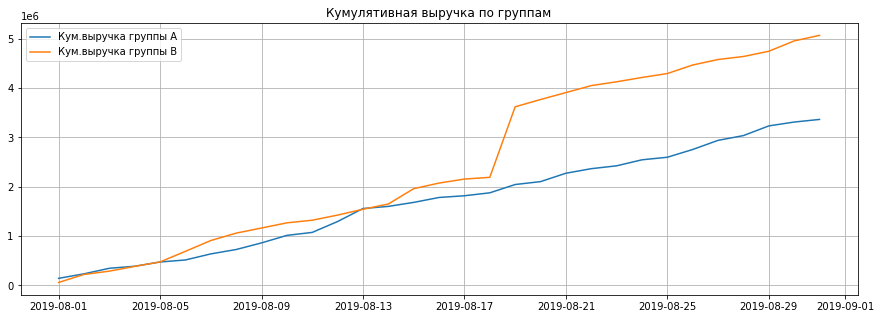

In [82]:
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Кум.выручка группы A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Кум.выручка группы B')
plt.title('Кумулятивная выручка по группам')
plt.grid()
plt.legend();

##### Вывод:

Мы видим, что в начале выручка группы 'B' росла немного быстрее выручки группы 'А'. Приблизительно 13-го августа выручки групп почти сравнялись, но затем группа 'B' уверенно забирает лидерство и во второй половине августа мы наблюдаем резкий скачек выручки в группе 'B'. После этого скачка рост выручки в обеих группах примерно одинаковый, соответственно все преимущество группы 'B' строится из одного резкого скачка выручки в районе 18-го, 19-го числа.

####  <a name="task_2"></a>  2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

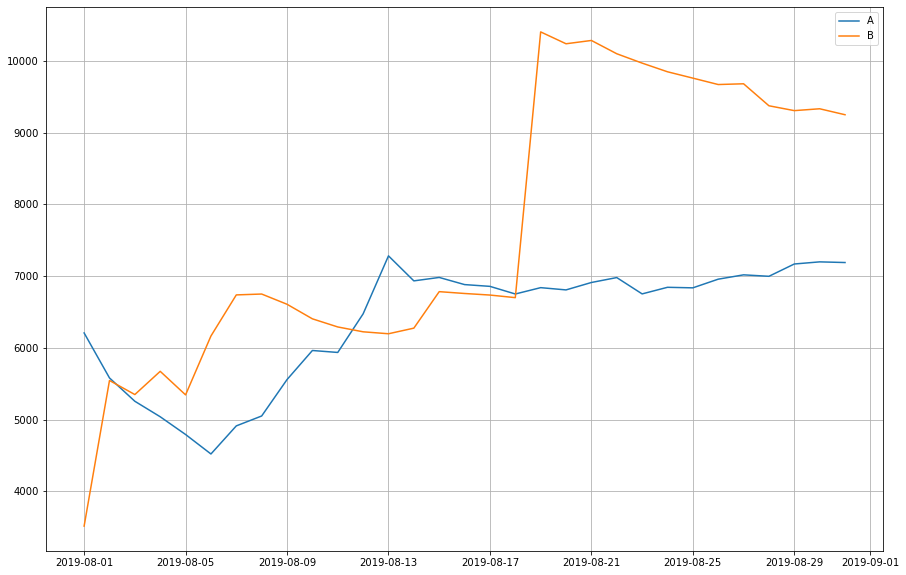

In [83]:
plt.figure(figsize=(15,10))
plt.grid()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend();

##### Вывод:

Средний чек в двух группах изначально имеет различия. В первой половине месяца в группе 'В' средний чек растет волнообразно, а в группе 'А' в начале снижается и потом тоже начинает расти более стремительными темпами. Затем, в районе 11-го числа средние чеки в группах равны и затем средний чек в группе 'B' резко подскакивает. Это результат крупного заказа, который мы также видели на предыдущем графике. После этого средний чек группы 'B' постепенно снижается, а в группе 'А' наблюдается незначительный рост до конца месяца.

####  <a name="task_3"></a> 3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

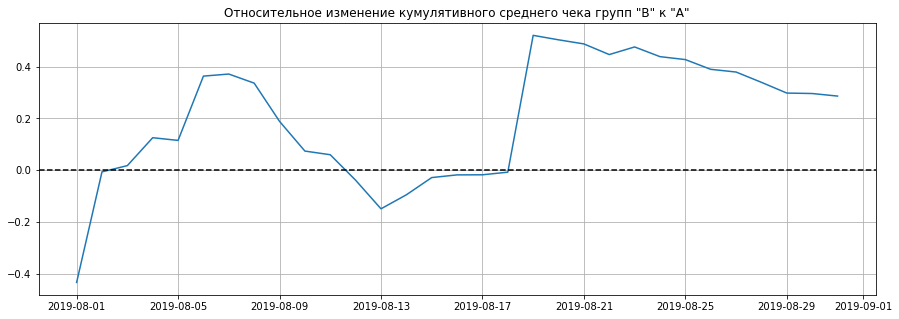

In [84]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/ \
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Относительное изменение кумулятивного среднего чека групп "B" к "А"')

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') ;

##### Вывод:

Мы видим, что данные практически все время сильно отличаются от средней и мы видим как резкие падения, так и большие скачки. Этот график является производной предыдущего графика, поэтому выводы и показания на нем аналогичны с предыдущем.

####  <a name="task_4"></a>  4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

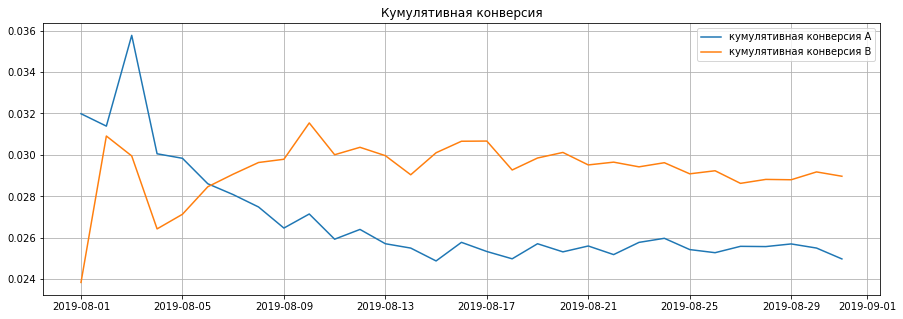

In [85]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='кумулятивная конверсия A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='кумулятивная конверсия B')
plt.title('Кумулятивная конверсия')
plt.legend();

##### Вывод:

В начале месяца конверсия в группе ‘A’ была значительно больше, но уже к началу второй недели месяца конверсии сравнялись, и группа ‘B’ стала значительно превосходить группу ‘A’. Затем на протяжении месяца конверсии в обеих группах практически не изменялись

####  <a name="task_5"></a>  5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

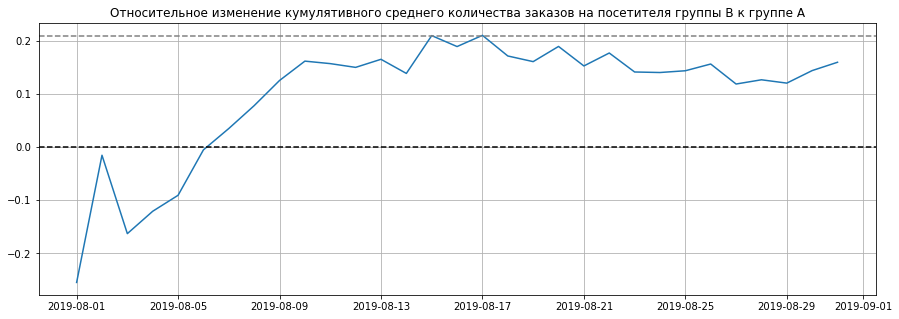

In [86]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])


plt.figure(figsize=(15,5))
plt.grid()
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.21, color='grey', linestyle='--');


##### Вывод:

Выводы по этому графику очень схожи с выводами из предыдущего пункта. В начале месяца конверсия в группе ‘A’ была значительно больше, но уже к началу второй недели месяца конверсии сравнялись. Затем, конверсия в группе ‘B’ стала сильно выше конверсии группы ‘A’ и до конца месяца средние показатели оставались на том же уровне. Максимальная разница конверсий в двух группах приходится на 15-ое августа. В этот день разница конверсий составила 21%.

####  <a name="task_6"></a> 6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [87]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False). \
                                                                        agg({'transactionId' : pd.Series.nunique})
ordersByUsers.columns = ['user_id','orders']

ordersByUsers.sort_values(by='orders',ascending=False).head(5)

,user_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3


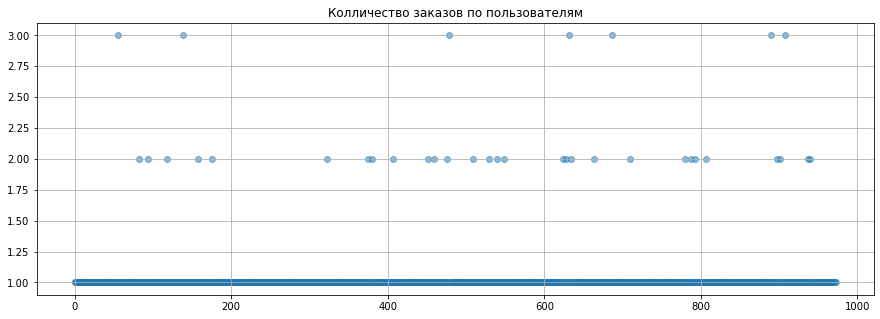

In [88]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(15,5))
plt.grid()
plt.scatter(x_values, ordersByUsers['orders'], alpha = 0.5)
plt.title('Колличество заказов по пользователям');

##### Вывод:

Из графика видно, что больше всего пользователей, совершивших один заказ, пользователей, которые совершили 2 заказа уже значительно меньше, так же есть несколько выбросов из пользователей, которые совершали 8, 9 или даже 11 заказов.

####  <a name="task_7"></a>  7.Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [89]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[1. 2.]


Из этих рассчетов нельзя точно сказать границу, поэтому посчиаем больше перцентилей.

In [90]:
print(np.percentile(ordersByUsers['orders'], [95, 95.5, 96, 96.5, 97, 97.5, 98, 98.5, 99])) 

[1. 1. 1. 2. 2. 2. 2. 2. 2.]


In [91]:
percent_975 = np.percentile(ordersByUsers['orders'], [97.5])
percent_975 = percent_975[0]
print(percent_975)

2.0


##### Вывод:

Мы видим, что большинство пользователей (97.5%) делают не более 2х заказов. Все что больше  - будем считать аномалией.

####  <a name="task_8"></a>  8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

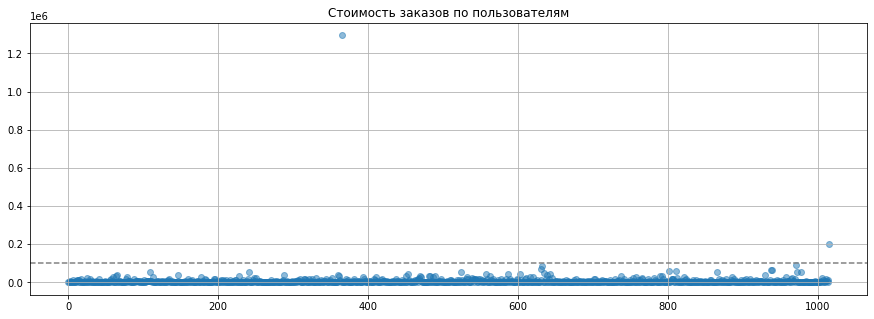

In [92]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(15,5))
plt.grid()
plt.scatter(x_values, orders['revenue'], alpha = 0.5)
plt.title('Стоимость заказов по пользователям')
plt.axhline(y=100000, color='grey', linestyle='--');

##### Вывод:

Из графика видно, что абсолютное большинство заказов находится в пределах 100000 и в данных есть всего два выброса более 100000.

##### Построим более наглядный график, отбросив аномальные значения.

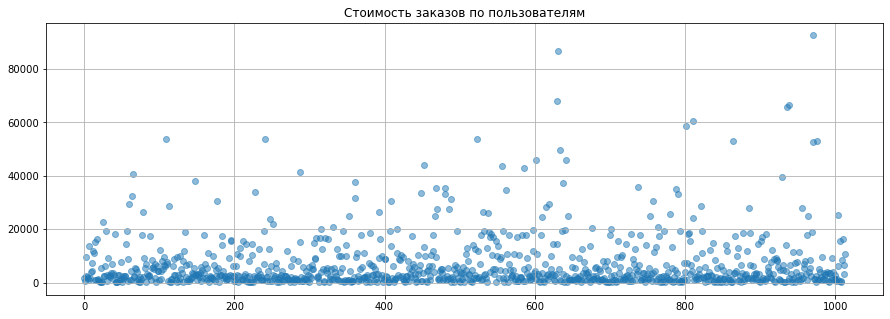

In [93]:
norm_orders = orders[orders['revenue']<=199000]['revenue']
xn_values = pd.Series(range(0,len(norm_orders)))

plt.figure(figsize=(15,5))
plt.grid()
plt.title('Стоимость заказов по пользователям')
plt.scatter(xn_values, norm_orders, alpha=0.5);

##### Вывод:

Используем новый график с ограничением стоимости заказа в 199000. Из этого графика видно, что большинство заказов находится в пределах 20000, а заказов более 60000 совсем мало.

####  <a name="task_9"></a> 9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [94]:
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


Из этих рассчетов нельзя точно сказать границу, поэтому посчитаем больше перцентилей.

In [95]:
print(np.percentile(orders['revenue'], [95, 97.5, 98, 99])) 

[26785. 37400. 42353. 53904.]


In [96]:
percent_98 = np.percentile(orders['revenue'], [98])
percent_98 = percent_98[0]
print(percent_98)

42352.99999999991


##### Вывод:

98% заказов находятся в пределах цены 42353, установим ее как границу аномалий.  

####  <a name="task_10"></a>  10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

In [97]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

Объединяем данные в одну таблицу:

In [98]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

display(data.head())

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


##### Формулируем гипотезы, которые будем опровергать или подтверждать далее.

H0: Статистически значимых различий в среднем количестве заказов между группами по сырым данным нет.

H1: Статистически значимые различия в среднем количестве заказов между группами по сырым данным есть.

**Создадим переменные `ordersByUsersA` и `ordersByUsersB` со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов**

In [99]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

Объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [100]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [101]:
print("alpha =",0.05)
print("p-value = {0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

alpha = 0.05
p-value = 0.01102
Относительный показатель 'B' и 'A' = 0.160


##### Вывод:

Альфа была 0.05, p-value = 0.01102 => p-value меньше альфа и мы отвергаем нулевую гипотезу. Значит есть статистические различия в конверсии между группами. Группа B превосходит группу А на 16%.

####  <a name="task_11"></a>  11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

##### Формулируем гипотезы, которые будем опровергать или подтверждать далее.

H0: Статистически значимых различий в среднем чеке между группами по сырым данным нет.

H1: Статистически значимые различия в среднем чеке между группами по сырым данным есть.

In [102]:
print("alpha =",0.05)
print('p-value = {0:.5f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный показатель "B" и "A" = {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

alpha = 0.05
p-value = 0.82949
Относительный показатель "B" и "A" = 0.287


##### Вывод:

p-value значительно больше альфы => мы не отвергаем нулевую гипотезу и можем утверждать, что в среднем чеке нет различий. 

По результатам анализа сырых данных средние чеки схожи. При 
том мы так же видим, что средний чек в группе B больше среднего чека в группе А на 28.7%.

####  <a name="task_12"></a>  12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

##### Формулируем гипотезы, которые будем опровергать или подтверждать далее.

H0: Статистически значимых различий в среднем колличестве заказов на посетителя между группами по очищенным данным нет.

H1: Статистически значимые различия в среднем колличестве заказов на посетителя между группами по сырым данным есть.

Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 42 353 рублей. Так мы уберём 2.5% пользователей с наибольшим числом заказов и 2% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — `usersWithManyOrders` и пользователей, совершивших заказы дороже 42 353 — `usersWithExpensiveOrders`. Объединим их в таблице `abnormalUsers`. 

In [103]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > percent_975]['visitorId'], 
        ordersByUsersB[ordersByUsersB['orders'] > percent_975]['visitorId']
    ], 
    axis = 0
)

usersWithExpensiveOrders = orders[orders['revenue'] > percent_98]['visitorId']

abnormalUsers = (pd.concat(
    [usersWithManyOrders, usersWithExpensiveOrders], axis = 0)
    .drop_duplicates()
    .sort_values()
                )

print(abnormalUsers.head(5))
print("Всего ненормальных пользователей :" ,len(abnormalUsers)) 

1099    148427295
33      249864742
684     358944393
648     382846391
58      611059232
Name: visitorId, dtype: int64
Всего ненормальных пользователей : 28


Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [104]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

**Применим статистический критерий Манна-Уитни к полученным выборкам:**

In [105]:
print("alpha =",0.05)
print('p-value = {0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный показатель "B" и "A" = {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

alpha = 0.05
p-value = 0.00364
Относительный показатель "B" и "A" = 0.209


##### Вывод:

p-value меньше альфы => мы отвергаем нулевую гипотезу. 

Между группами есть статистически значимые различия конверсии.

Значит, как и в сырых данных, в очищенных данных есть раздичия между группами.

Относительное превосходство группы "B" над "A" равно 20.9% (выше, чем с «сырыми» данными - 16%) .

####  <a name="task_13"></a>  13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

##### Формулируем гипотезы, которые будем опровергать или подтверждать далее.

H0: Статистически значимых различий в среднем чеке между группами по очищенным данным нет.

H1: Статистически значимые различия в среднем чеке между группами по сырым данным есть.

In [106]:
print("alpha =",0.05)

print(
    'p-value = {0:.5f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительный показатель 'B' и 'A' = {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

alpha = 0.05
p-value = 0.85814
Относительный показатель 'B' и 'A' = 0.079


##### Вывод:

p-value снова значительно больше альфы. => мы не отвергаем нулевую гипотезу и можем утверждать, что в среднем чеке нет различий. 

По результатам анализа очищенных данных средние чеки схожи. 

При этом мы так же видим, что средний чек в группе B больше среднего чека в группе А на 7.9%. В сырых данных средний чек группы В был больше на 28.7%. Такая сильная равзница объясняется одним очень большим заказом в группе В, который исказил результаты исследования, но в очищенных данных мы отбросили его.

####  <a name="task_14"></a>  14. Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

Результаты тестирований показали:
- В сырых данных различия в конверсии между группами A и В есть.
- В очищенных данных различия в конверсии между группами A и В есть.

- В сырых данных группа В превосходит группу А на 16%
- В очищенных – на 20.9%

Как в сырых, так и в очищенных данных различия в средних чеках групп А и В отсутствуют, не смотря на то, что даже в очищенных данных средний чек группы В больше среднего чека группы А на 7.916%. Однако в сырых данных средний чек группы В был больше среднего чека группы А на 28.7%. Это было вызвано одним аномально большим заказом в группе В, который повлиял на все данные группы В и исказил исследование. В очищенных данных этот заказ был отброшен и мы получили более достоверные результаты исследования, кторые не учитывали такого рода аномалий в данных.

Результаты тестирования вполне однозначны. В итоге можно принять решение остановить тестирование и констатировать победу группы B: группа B значительно лучше (эффективнее) группы A по конверсии, хотя по среднему чеку группы примерно равны.
